$Se\ requiere\ una\ red\ neuronal\ que\ distinga\ entre\ dos\ nubes\ de\ puntos,\  que\ sea\ capaz\ den\ separarlos\ sin\ intervención\ humana:$


<ol>
<li> En un primer momento no se proporciona un imput asopciado a las nubes de puntos,  con lo cual se seleccionan nubes de </li>datos concéntricos,  para ello se utiliza la librería "make_circles" de sklearn.
    <ul>
    <li>Al mismo tiempo se importan las librerías necesarias.</li>
    </ul>
</ol>

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
#para crear el data set se utiliza make_circles
from sklearn.datasets import make_circles

In [2]:
n=1000
#Donde n es el numero de datos que se tienen de imput

p=2 

#es el numero de dimenciones
#esto hace que las multiplicaciones de matrices no matcheen
#la variable X es el Dataset que estamos tratando de resolver mientras que el Y es un vector binario.

X, Y = make_circles(
    n_samples=n,
    #shuffle=False,
    noise=0.25,
    #random_state=None,
    factor=0.28
)
print (X)
print (Y)
Y= Y[:, np.newaxis]
print(Y.shape)

[[ 0.12036721  0.96344906]
 [ 0.40424734 -0.0824275 ]
 [ 0.69900838 -0.20397826]
 ...
 [ 0.35920425 -0.15276567]
 [ 0.84870339  0.60439118]
 [-1.24527458  0.46789661]]
[0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0
 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0
 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1
 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1
 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1
 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0
 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1
 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1
 1 1 0 

A coontinuación graficamos los datos:

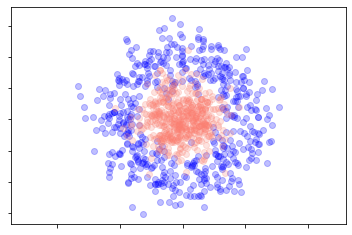

In [3]:
plt.scatter(X[Y[:,0]==0, 0], X[Y[:,0]==0,1], color="blue", alpha=0.25)
plt.scatter(X[Y[:,0]==1, 0], X[Y[:,0]==1,1], color="Salmon",alpha=0.225)
plt.axis("equal")
plt.show
plt.tick_params(labelbottom=False, labelleft=False)

In [4]:
#creamos la clase de las capas de la red
class capa_neural():
    def __init__(self, n_con, n_neur, act_f):
        
        self.act_f = act_f
        
        self.b = np.random.rand(1, n_neur)    *2-1
        self.W=np.random.rand(n_con, n_neur) *2-1

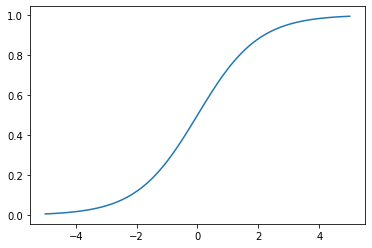

In [5]:
# creamos las funciones de activación.
# la función sigmoide y su derivada como pares. Asi se definen funciones matemáticas con Numpy
sigm=(lambda x: 1 / (1 + np.e ** (-x) ),
      lambda x: x * (1 - x))

_x=np.linspace(-5, 5,100)
plt.plot(_x, sigm[0](_x))

In [6]:
# creamos la topología (estructura de la red)
# estructura de datos que sostiene la estrctura de la red....nn[]

def create_nn(topologia, act_f):
   
    nn = []
   
    for l, layer in enumerate(topologia[:-1]):  ##enumerate es para trabajar con el bucle tanto el indice como la capa
        
        nn.append(capa_neural(topologia[l], topologia[l+1], act_f))
    
    return nn


In [7]:
# el proceso de entrenamiento conlleva tres pasos:
#procesamiento de los valores de entrada a través de la red mediente las capas y sus funciones de activación
#el resultado se compara con la infromación y se obtiene el error.
# decenso del gradiente para minimizar el error.
# así que hay que dfinir una "función de costo" una elasticidad!!!

topologia = [p,3, 4, 3, 1]
neural_net = create_nn(topologia, sigm)

In [9]:

# error cuadrático medio; YP: valor predicho;Yp: valor real

elast = (lambda Yp, Yr: np.mean((Yp - Yr)**2),
           lambda Yp, Yr:(Yp-Yr))


def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
    #forward pass
    
    out = [(None, X)]
    
    for l,layer in enumerate(neural_net):
    
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b
        a = neural_net[l].act_f[0](z)

        out.append((z, a)) # out es una predicción************
  
    if train:
    
    #backward pass
        deltas=[]

        for l in reversed(range(0, len(neural_net))):
            
            z=out[l+1][0]
            a=out[l+1][1]
            
            #print(a.shape)# salidas si fuermos hacia atrás

            if l == len(neural_net) - 1:

                deltas.insert(0, elast[1](a, Y) * neural_net[l].act_f[1](a))

            else:
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

            _W=neural_net[l].W

    #descenso del gradiente
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
    
        
    
    return out[-1][1]


train(neural_net, X, Y, elast, 0.5)
print("")


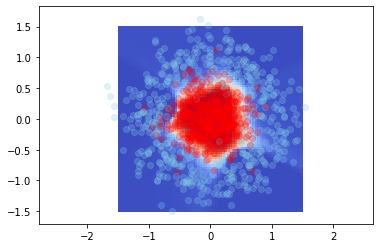

In [10]:
import time 
from IPython.display import clear_output

neural_n = create_nn(topologia, sigm)

loss=[]

for i in range(6000):
    
    #entrenamiento e la red
    pY = train(neural_n, X, Y, elast, lr=0.06)
    
    if i % 25 == 0:
        loss.append(elast[0](pY, Y))
        
        res=75
        
        #genera una malla de 50X50
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
        
        _Y = np.zeros((res, res))
        
        
        
        for i0, x0 in enumerate(_x0):
            for i1,x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, elast, train=False)[0][0]
        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")
        
        plt.scatter(X[Y[:,0]==0, 0], X[Y[:,0]==0, 1], c="skyblue", alpha=0.25)
        plt.scatter(X[Y[:,0]==1, 0], X[Y[:,0]==1, 1], c="red", alpha=0.225)
        
        clear_output(wait=True)
        plt.show()
        
        #myAnimation.save('redneural.gif', writer='imagemagick', fps=30)
        


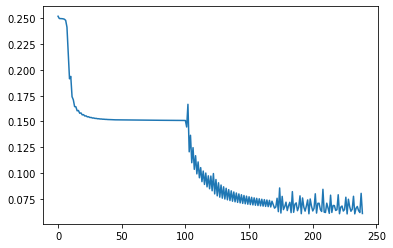

In [11]:
plt.plot(range(len(loss)), loss)
plt.show()
time.sleep(0.5)